# DMML exam: 2023-07-26

The **objective of the exercise is to predict whether or not a patient has Diabetes (attribute "Outcome")**, based on certain information and measurements included in the dataset.


- Pregnancies: number of pregnancies the patient has had;
- Sex: (M) Male or (F) Female;
- Glucose: blood glucose level;
- BloodPressure: blood pressure;
- SkinThickness: skin thickness;
- Insulin: insulin level;
- BMI: body mass index;
- DiabetesPedigreeFunction: genetic predisposition to diabetes;
- Age: age;
- Outcome: 
    - 0: the patient does not have diabetes
    - 1: the patient does have diabetes
- CalorieIntake: daily caloric intake;
- Exercise: whether and when exercise is performed:
    - “No” indicates that the patient does not engage in any kind of exercise;
    - “Evening” indicates that the patient does exercise mainly in the evening;
    - “Morning” indicates that the patient does exercise mainly in the morning;
    - “Both” indicates that the patient does exercise both morning and evening;
- SleepDuration: hours of sleep per day.

# Instructions summary
1. Import the *diabetes.csv* dataset
2. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis   
3. Perform the required data preprocessing steps:
    - Obtain a numeric representation of the categorical variables
4. Carry out a **classification analysis** aimed at predicting the **Outcome** value considering the following setting:
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - DecisionTree classifier (setting the maximum depth equal to 3)
        - KNearestNeighbor classifier (default params)
        - RandomForest classifier (default parameters) after rebalancing with RandomOverSampler 
    - Report and discuss the results, motivating the choice of the most suitable model

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the *diabetes.csv* dataset

In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Sex,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,F,101,76,48,180,32.9,0.171,63,0,2860.0,Morning,6
764,2,F,122,70,27,0,36.8,0.340,27,0,3320.0,Morning,7
765,0,M,121,72,23,112,26.2,0.245,30,0,3453.0,Evening,4
766,1,F,126,60,0,0,30.1,0.349,47,1,8850.0,No,8


In [3]:
df.dtypes

Pregnancies                   int64
Sex                          object
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
CalorieIntake               float64
Exercise                     object
SleepDuration                 int64
dtype: object

In [4]:
df.shape

(768, 13)

# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [5]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Sex                       768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
 10  CalorieIntake             753 non-null    float64
 11  Exercise                  768 non-null    object 
 12  SleepDuration             768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


In [6]:
df.isna().any()

Pregnancies                 False
Sex                         False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
CalorieIntake                True
Exercise                    False
SleepDuration               False
dtype: bool

In [7]:
df.isna().sum(axis=0)

Pregnancies                  0
Sex                          0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
CalorieIntake               15
Exercise                     0
SleepDuration                0
dtype: int64

In [8]:
df['CalorieIntake'].mean()

3639.5953519256304

In [9]:
df['CalorieIntake'].describe()

count     753.000000
mean     3639.595352
std      1694.490299
min       380.000000
25%      2620.000000
50%      2893.000000
75%      4100.000000
max      9990.000000
Name: CalorieIntake, dtype: float64

In [10]:
df['CalorieIntake'].fillna(df['CalorieIntake'].mean(), inplace=True)

In [11]:
df.isna().values.any()

False

In [12]:
df.isna().sum(axis=0)

Pregnancies                 0
Sex                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
CalorieIntake               0
Exercise                    0
SleepDuration               0
dtype: int64

In [13]:
df.describe(include='object')

,Sex,Exercise
count,768,768
unique,2,4
top,F,Morning
freq,525,276


In [14]:
df.Exercise.dtypes

dtype('O')

In [15]:
nominal=['Sex', 'Exercise']
numerical=list((set(df)- set(nominal))-set(['Outcome']))

In [16]:
numerical

['SkinThickness',
 'Glucose',
 'Pregnancies',
 'Insulin',
 'DiabetesPedigreeFunction',
 'CalorieIntake',
 'BMI',
 'BloodPressure',
 'SleepDuration',
 'Age']

In [17]:
df[numerical].corr()

,SkinThickness,Glucose,Pregnancies,Insulin,DiabetesPedigreeFunction,CalorieIntake,BMI,BloodPressure,SleepDuration,Age
SkinThickness,1.000000,0.057328,-0.033670,0.436783,0.183928,0.034200,0.392573,0.207371,0.079192,-0.113970
Glucose,0.057328,1.000000,-0.001736,0.331357,0.137337,0.335336,0.221071,0.152590,0.170151,0.263514
Pregnancies,-0.033670,-0.001736,1.000000,-0.023243,-0.015277,0.015058,-0.042273,-0.011220,0.156936,-0.000442
Insulin,0.436783,0.331357,-0.023243,1.000000,0.185071,0.107934,0.197859,0.088933,0.052830,-0.042163
DiabetesPedigreeFunction,0.183928,0.137337,-0.015277,0.185071,1.000000,0.109421,0.140647,0.041265,0.150755,0.033561
CalorieIntake,0.034200,0.335336,0.015058,0.107934,0.109421,1.000000,0.181753,-0.038191,0.318369,0.130654
BMI,0.392573,0.221071,-0.042273,0.197859,0.140647,0.181753,1.000000,0.281805,0.156188,0.036242
BloodPressure,0.207371,0.152590,-0.011220,0.088933,0.041265,-0.038191,0.281805,1.000000,-0.023178,0.239528
SleepDuration,0.079192,0.170151,0.156936,0.052830,0.150755,0.318369,0.156188,-0.023178,1.000000,0.099983
Age,-0.113970,0.263514,-0.000442,-0.042163,0.033561,0.130654,0.036242,0.239528,0.099983,1.000000


<Axes: >

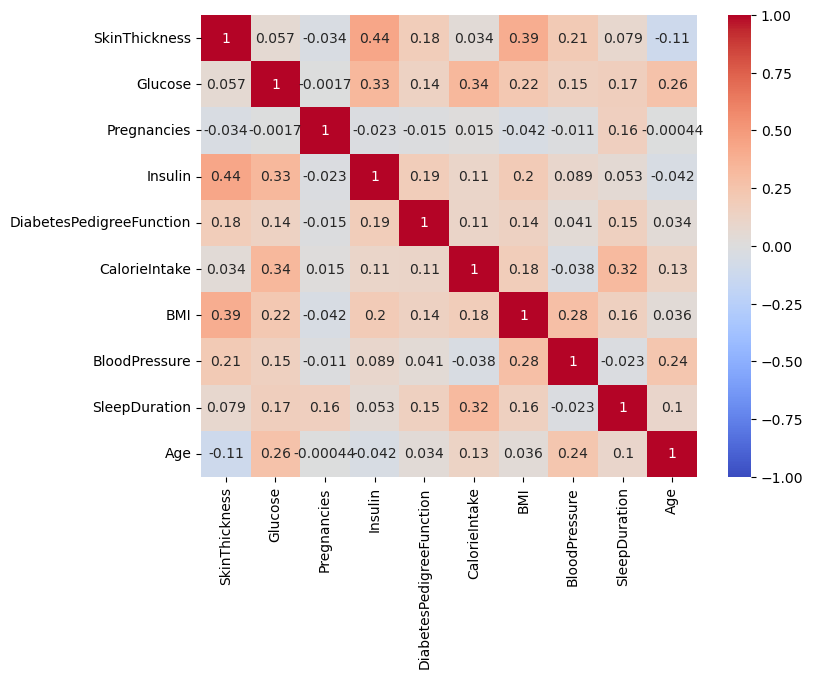

In [18]:
plt.figure(figsize= (8, 6))
sns.heatmap(df[numerical].corr(), annot = True, vmin=-1, vmax=1,cmap = "coolwarm")

All the features seem to be incorrelated, so we cannot drop any of them.

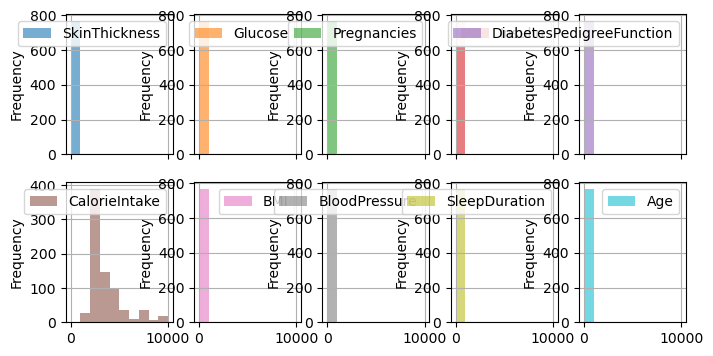

In [19]:
df[numerical].plot(kind='hist',
                  alpha=0.6,
                  grid=True,
                  subplots=True,
                  figsize=(8,4),
                  layout=(2,5))
plt.show()

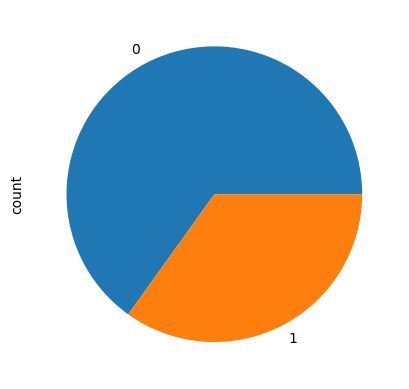

In [20]:
df['Outcome'].value_counts().plot.pie()
plt.show()

<Axes: xlabel='Outcome', ylabel='Count'>

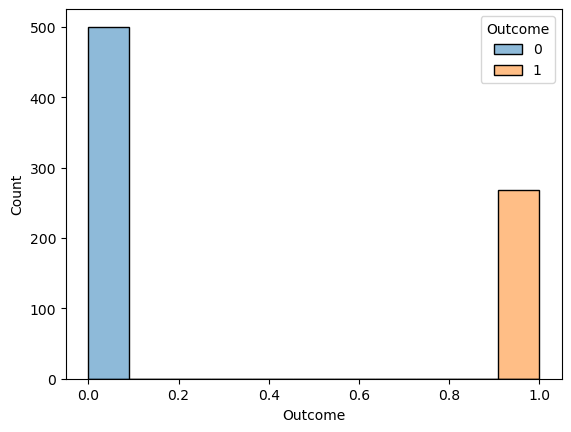

In [21]:
sns.histplot(data=df, x='Outcome', hue='Outcome')

In [22]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 3. Perform the required data preprocessing steps 
- Obtain a numeric representation of the categorical variables.


In [23]:
# TODO
df[nominal]

,Sex,Exercise
0,M,No
1,F,Evening
2,M,Morning
3,F,Evening
4,M,No
...,...,...
763,F,Morning
764,F,Morning
765,M,Evening
766,F,No


In [24]:
diz_sex= {'M':0, 'F':1}
df['Sex']= df['Sex'].apply(lambda x: diz_sex[x])
df['Sex']

0      0
1      1
2      0
3      1
4      0
      ..
763    1
764    1
765    0
766    1
767    1
Name: Sex, Length: 768, dtype: int64

In [25]:
col=['Exercise']
x_t= df.drop(['Outcome'], axis=1)
y_t= df.Outcome
enc=OneHotEncoder()
encoded=enc.fit_transform(x_t[col]).toarray()
x_encoded= pd.DataFrame(encoded, columns=enc.get_feature_names_out(col))
x= pd.concat([x_t, x_encoded], axis=1)
x_t=x_t.drop(col, axis=1)
x_t

,Pregnancies,Sex,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,SleepDuration
0,0,0,148,72,35,0,33.6,0.627,50,2508.300000,6
1,1,1,85,66,29,0,26.6,0.351,31,2760.000000,8
2,0,0,183,64,0,0,23.3,0.672,32,6480.000000,8
3,1,1,89,66,23,94,28.1,0.167,21,3639.595352,8
4,0,0,137,40,35,168,43.1,2.288,33,1970.000000,9
...,...,...,...,...,...,...,...,...,...,...,...
763,3,1,101,76,48,180,32.9,0.171,63,2860.000000,6
764,2,1,122,70,27,0,36.8,0.340,27,3320.000000,7
765,0,0,121,72,23,112,26.2,0.245,30,3453.000000,4
766,1,1,126,60,0,0,30.1,0.349,47,8850.000000,8


# 4. Carry out a **classification analysis** aimed at predicting the "Outcome" value considering the following setting
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - DecisionTree classifier (maximum depth equal to 3)
    - KNearestNeighbor classifier (default params)
    - RandomForest classifier (default parameters) after rebalancing with RandomOverSampler 
- Report and discuss the results, motivating the choice of the most suitable model


In [26]:
# TODO
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

accuracy 0.9544258373205741


,0,1,macro avg,weighted avg
f1-score,0.966,0.931,0.948,0.954
precision,0.940,0.989,0.965,0.957
recall,0.994,0.881,0.937,0.954
support,50.000,26.800,76.800,76.800


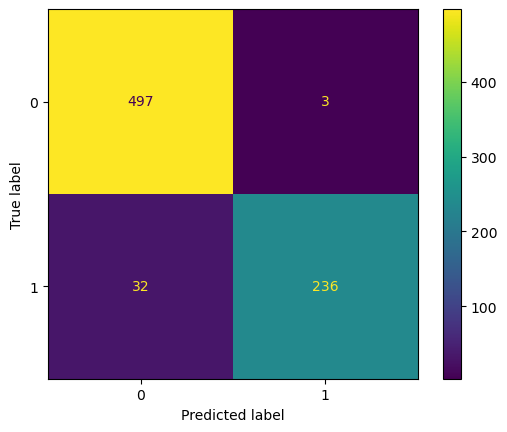

In [28]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=123, max_depth=3))]
pipe_dt = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_dt, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_dt, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [29]:
dt = cross_val_score(pipe_dt, x_t, y_t, scoring = make_scorer(f1_score, pos_label=1), cv = skf)
dt, dt.mean()

(array([0.94117647, 0.89795918, 0.94117647, 0.94117647, 0.98113208,
        0.89795918, 0.94117647, 0.89795918, 0.96      , 0.90566038]),
 0.9305375886203539)

accuracy 0.8697710184552289


,0,1,macro avg,weighted avg
f1-score,0.905,0.792,0.848,0.866
precision,0.864,0.892,0.878,0.874
recall,0.952,0.717,0.834,0.870
support,50.000,26.800,76.800,76.800


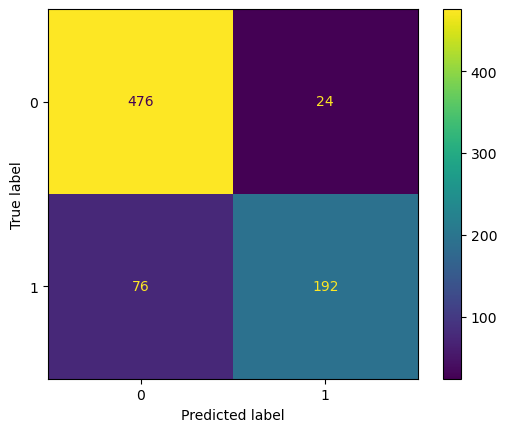

In [30]:
estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('clf', KNeighborsClassifier())]
pipe_knn = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_knn, x_t, y_t)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_knn, x_t, y_t, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_t, y_pred)
plt.show()

In [31]:
knn = cross_val_score(pipe_knn, x_t, y_t, scoring = make_scorer(f1_score, pos_label=1), cv = skf)
knn, knn.mean()

(array([0.76595745, 0.72340426, 0.84      , 0.77272727, 0.86792453,
        0.73913043, 0.84      , 0.8       , 0.80851064, 0.76      ]),
 0.7917654576237301)

accuracy 0.978


,0,1,macro avg,weighted avg
f1-score,0.978,0.978,0.978,0.978
precision,0.969,0.988,0.978,0.978
recall,0.988,0.968,0.978,0.978
support,50.000,50.000,100.000,100.000


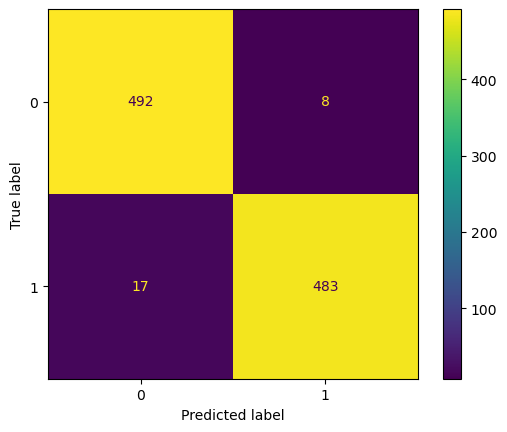

In [32]:
sampler=RandomOverSampler(random_state=42)
x_ROS, y_ROS= sampler.fit_resample(x_t,y_t)

estimators = [('missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
              ('scaler',StandardScaler()),
              ('clf', RandomForestClassifier())]
pipe_rf = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe_rf, x_ROS, y_ROS)

print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe_rf, x_ROS, y_ROS, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_ROS, y_pred)
plt.show()

In [33]:
rf=cross_val_score(pipe_rf, x_ROS, y_ROS, scoring = make_scorer(f1_score, pos_label=1), cv = skf)
rf, rf.mean()

(array([0.98      , 1.        , 0.96969697, 0.98989899, 0.95833333,
        0.98      , 0.96969697, 0.96969697, 0.96      , 0.98989899]),
 0.9767222222222223)

In [34]:
evaluation_results= pd.DataFrame({'dt': dt, 'knn': knn, 'random_forest': rf})
evaluation_results

,dt,knn,random_forest
0,0.941176,0.765957,0.980000
1,0.897959,0.723404,1.000000
2,0.941176,0.840000,0.969697
3,0.941176,0.772727,0.989899
4,0.981132,0.867925,0.958333
5,0.897959,0.739130,0.980000
6,0.941176,0.840000,0.969697
7,0.897959,0.800000,0.969697
8,0.960000,0.808511,0.960000
9,0.905660,0.760000,0.989899


Text(0, 0.5, 'f-score')

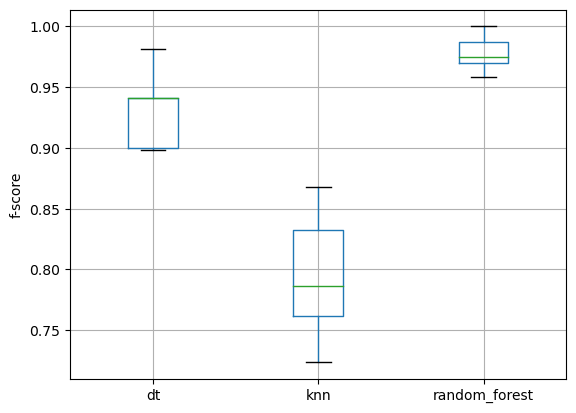

In [35]:
#to visualize the results
bplot=evaluation_results.boxplot()
bplot.set_ylabel('f-score')

From the results obtained, random forest pipeline seems to be the most suitable model.

In [36]:
#let's evaluate the statistics applying wilcoxon test
from scipy.stats import wilcoxon
print(wilcoxon(evaluation_results.dt, evaluation_results.knn))
print(wilcoxon(evaluation_results.dt, evaluation_results.random_forest))
print(wilcoxon(evaluation_results.random_forest, evaluation_results.knn))

WilcoxonResult(statistic=0.0, pvalue=0.001953125)
WilcoxonResult(statistic=1.0, pvalue=0.010792782163388177)
WilcoxonResult(statistic=0.0, pvalue=0.001953125)


C:\Users\chiar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\chiar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


With a level of confidence alpha= 5%, we reject H0 (the samples do not belong to the same distribution), because the p-value<0.05 meaning that such an extreme outcome is not likely under the assumption of having H0 true.

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
